https://machinelearningmastery.com/what-is-bayesian-optimization/

$$
y = x^2 + \sin(5 \pi x)^6, x\in (0,1)
$$


Optima: x=0.900, y=0.810


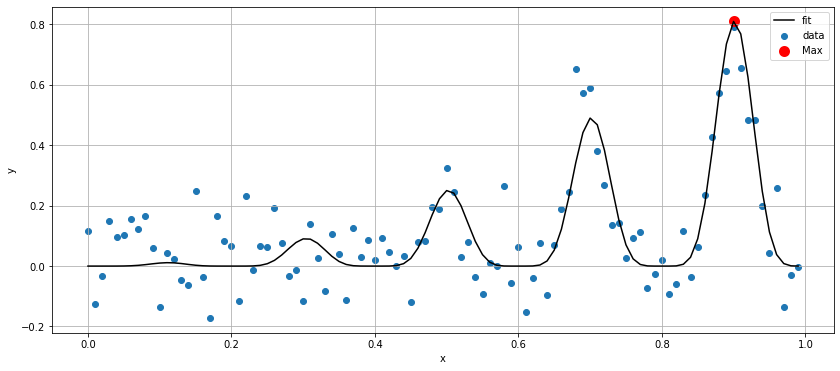

In [23]:

# example of the test problem
import math 

from matplotlib import pyplot
import numpy as np

# objective function
def objective(x, noise=0.1):
	noise = np.random.normal(loc=0, scale=noise)
	return (x**2 * math.sin(5 * math.pi * x)**6.0) + noise
 
# grid-based sample of the domain [0,1]
X = np.arange(0, 1, 0.01)
# sample the domain without noise
y = [objective(x, 0) for x in X]
# sample the domain with noise
ynoise = [objective(x) for x in X]
# find best result
ix = np.argmax(y)
print('Optima: x=%.3f, y=%.3f' % (X[ix], y[ix]))

pyplot.figure(figsize=(14,6))
# plot the points with noise
pyplot.scatter(X, ynoise,  label='data')
# plot the points without noise
pyplot.scatter(X[ix], y[ix], c='r', linewidths=5, label='Max')
pyplot.plot(X, y, color='k', label='fit')
# show the plot
pyplot.legend()
pyplot.grid()
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

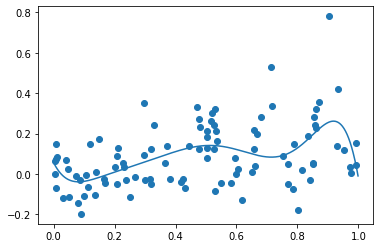

In [21]:

	
# example of a gaussian process surrogate function
from math import sin
from math import pi
from numpy import arange
from numpy import asarray
from numpy.random import normal
from numpy.random import random
from matplotlib import pyplot
from warnings import catch_warnings
from warnings import simplefilter
from sklearn.gaussian_process import GaussianProcessRegressor
 
# objective function
def objective(x, noise=0.1):
	noise = normal(loc=0, scale=noise)
	return (x**2 * sin(5 * pi * x)**6.0) + noise
 
# surrogate or approximation for the objective function
def surrogate(model, X):
	# catch any warning generated when making a prediction
	with catch_warnings():
		# ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)
 
# plot real observations vs surrogate function
def plot(X, y, model):
	# scatter plot of inputs and real objective function
	pyplot.scatter(X, y)
	# line plot of surrogate function across domain
	Xsamples = asarray(arange(0, 1, 0.001))
	Xsamples = Xsamples.reshape(len(Xsamples), 1)
	ysamples, _ = surrogate(model, Xsamples)
	pyplot.plot(Xsamples, ysamples)
	# show the plot
	pyplot.show()
 
# sample the domain sparsely with noise
X = random(100)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot the surrogate function
plot(X, y, model)